In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [2]:
data=pd.read_csv("Taxi.csv")
data.head()

,c,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,52:06.0,NaN,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,04:56.0,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,45:00.0,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,22:21.0,NaN,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,47:00.0,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [3]:
X=data.iloc[:,[0,7]].values
print(X)

[[2.4238194e+07 4.0723217e+01]
 [2.7835199e+07 4.0750325e+01]
 [4.4984355e+07 4.0772647e+01]
 [2.5894730e+07 4.0803349e+01]
 [1.7610152e+07 4.0761247e+01]
 [4.4470845e+07 4.0755910e+01]
 [4.8725865e+07 4.0774297e+01]
 [4.4195482e+07 0.0000000e+00]
 [1.5822268e+07 4.0743537e+01]]


In [4]:
y=data.iloc[:,8].values
print(y)

[1 1 1 3 5 1 5 1 1]


In [5]:
data=pd.read_csv("Taxi.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   c                  9 non-null      int64  
 1   key                9 non-null      object 
 2   fare_amount        6 non-null      float64
 3   pickup_datetime    9 non-null      object 
 4   pickup_longitude   9 non-null      float64
 5   pickup_latitude    9 non-null      float64
 6   dropoff_longitude  9 non-null      float64
 7   dropoff_latitude   9 non-null      float64
 8   passenger_count    9 non-null      int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 780.0+ bytes


In [6]:
data[1:10]

,c,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
1,27835199,04:56.0,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,45:00.0,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,22:21.0,NaN,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,47:00.0,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5
5,44470845,27:09.0,NaN,2011-02-12 02:27:09 UTC,-73.969019,40.755910,-73.969019,40.755910,1
6,48725865,04:00.0,24.5,2014-10-12 07:04:00 UTC,-73.961447,40.693965,-73.871195,40.774297,5
7,44195482,52:00.0,2.5,2012-12-11 13:52:00 UTC,0.000000,0.000000,0.000000,0.000000,1
8,15822268,32:00.0,9.7,2012-02-17 09:32:00 UTC,-73.975187,40.745767,-74.002720,40.743537,1


In [7]:
bool_series=pd.notnull(data["fare_amount"])
data[bool_series]

,c,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
1,27835199,04:56.0,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,45:00.0,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
4,17610152,47:00.0,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5
6,48725865,04:00.0,24.5,2014-10-12 07:04:00 UTC,-73.961447,40.693965,-73.871195,40.774297,5
7,44195482,52:00.0,2.5,2012-12-11 13:52:00 UTC,0.000000,0.000000,0.000000,0.000000,1
8,15822268,32:00.0,9.7,2012-02-17 09:32:00 UTC,-73.975187,40.745767,-74.002720,40.743537,1


In [8]:
bool_series=pd.isnull(data["fare_amount"])
data[bool_series]

,c,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,52:06.0,NaN,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
3,25894730,22:21.0,NaN,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
5,44470845,27:09.0,NaN,2011-02-12 02:27:09 UTC,-73.969019,40.755910,-73.969019,40.755910,1


In [9]:
new_data=data.dropna(axis=0,how='any')
new_data

,c,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
1,27835199,04:56.0,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,45:00.0,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
4,17610152,47:00.0,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5
6,48725865,04:00.0,24.5,2014-10-12 07:04:00 UTC,-73.961447,40.693965,-73.871195,40.774297,5
7,44195482,52:00.0,2.5,2012-12-11 13:52:00 UTC,0.000000,0.000000,0.000000,0.000000,1
8,15822268,32:00.0,9.7,2012-02-17 09:32:00 UTC,-73.975187,40.745767,-74.002720,40.743537,1


In [10]:
data["fare_amount"]=data["fare_amount"].fillna(method="ffill")
data

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_9140\1823229270.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data["fare_amount"]=data["fare_amount"].fillna(method="ffill")


,c,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,52:06.0,NaN,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,04:56.0,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,45:00.0,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,22:21.0,12.9,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,47:00.0,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5
5,44470845,27:09.0,16.0,2011-02-12 02:27:09 UTC,-73.969019,40.755910,-73.969019,40.755910,1
6,48725865,04:00.0,24.5,2014-10-12 07:04:00 UTC,-73.961447,40.693965,-73.871195,40.774297,5
7,44195482,52:00.0,2.5,2012-12-11 13:52:00 UTC,0.000000,0.000000,0.000000,0.000000,1
8,15822268,32:00.0,9.7,2012-02-17 09:32:00 UTC,-73.975187,40.745767,-74.002720,40.743537,1


In [11]:
data["fare_amount"]=data["fare_amount"].fillna(method="bfill")
data

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_9140\2129788991.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data["fare_amount"]=data["fare_amount"].fillna(method="bfill")


,c,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,52:06.0,7.7,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,04:56.0,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,45:00.0,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,22:21.0,12.9,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,47:00.0,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5
5,44470845,27:09.0,16.0,2011-02-12 02:27:09 UTC,-73.969019,40.755910,-73.969019,40.755910,1
6,48725865,04:00.0,24.5,2014-10-12 07:04:00 UTC,-73.961447,40.693965,-73.871195,40.774297,5
7,44195482,52:00.0,2.5,2012-12-11 13:52:00 UTC,0.000000,0.000000,0.000000,0.000000,1
8,15822268,32:00.0,9.7,2012-02-17 09:32:00 UTC,-73.975187,40.745767,-74.002720,40.743537,1


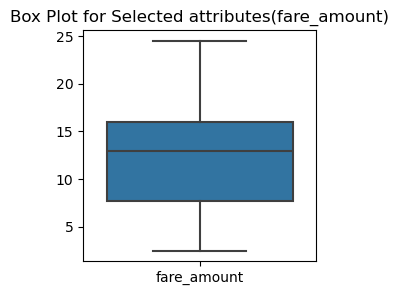

In [12]:
import seaborn as sns
attributes = ['fare_amount']
plt.figure(figsize=(3,3))
sns.boxplot(data=data[attributes])
plt.title('Box Plot for Selected attributes(fare_amount)')
plt.show()

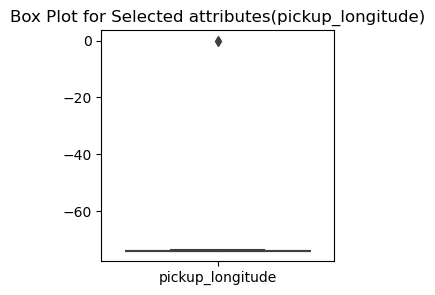

In [13]:
attributes = ['pickup_longitude']
plt.figure(figsize=(3,3))
sns.boxplot(data=data[attributes])
plt.title('Box Plot for Selected attributes(pickup_longitude)')
plt.show()

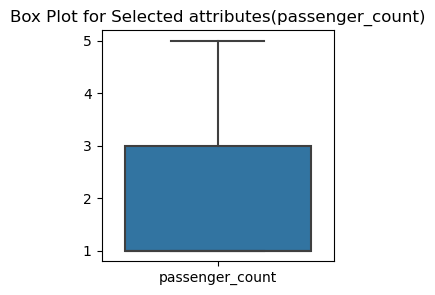

In [14]:
attributes = ['passenger_count']
plt.figure(figsize=(3,3))
sns.boxplot(data=data[attributes])
plt.title('Box Plot for Selected attributes(passenger_count)')
plt.show()

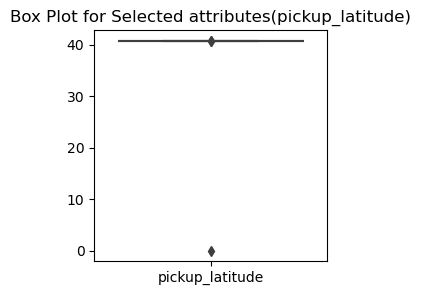

In [15]:
attributes = ['pickup_latitude']
plt.figure(figsize=(3,3))
sns.boxplot(data=data[attributes])
plt.title('Box Plot for Selected attributes(pickup_latitude)')
plt.show()

In [16]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
print(X_train)

[[4.4984355e+07 4.0772647e+01]
 [2.4238194e+07 4.0723217e+01]
 [4.8725865e+07 4.0774297e+01]
 [2.5894730e+07 4.0803349e+01]
 [1.5822268e+07 4.0743537e+01]
 [1.7610152e+07 4.0761247e+01]
 [4.4470845e+07 4.0755910e+01]]


In [17]:
print(X_test)

[[4.4195482e+07 0.0000000e+00]
 [2.7835199e+07 4.0750325e+01]]


In [18]:
print(y_train,y_test)

[1 1 5 3 1 5 1] [1 1]


In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)
print(X_train)

In [ ]:
print(y_train,y_test)

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report



In [ ]:
treemodel = DecisionTreeClassifier()

In [ ]:
treemodel.fit(X_train, y_train)
DecisionTreeClassifier()

In [ ]:
y_pred = treemodel.predict(X_test)

In [ ]:
print(classification_report(y_pred, y_test))

In [ ]:
print(y_pred)

In [ ]:
print(y_test)

In [ ]:
y_test = np.array([1,1])  
y_pred = np.array([1,5])  

cm = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:")
print(cm)

In [ ]:
from sklearn.metrics import accuracy_score
print("Accuracy: ", accuracy_score())